In [1]:
from __future__ import division, print_function, unicode_literals

import os, psutil, gc, glob, pdb, sys, mkl
p = psutil.Process(os.getpid())
p.nice(psutil.HIGH_PRIORITY_CLASS)
mkl.set_num_threads(mkl.get_max_threads())

import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import pandas as pd
import statsmodels as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'image.cmap': 'gray'})
mpl.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
%matplotlib inline

In [2]:
z_5pc = np.sqrt(2)*sp.special.erfinv(1-0.05)
z_5pc

1.959963984540054

## Random variables and convergence

**2.13.a.** $X \sim \mathcal{N}(0,1)$ and $Y = e^X$. Generate a vector x of 10,000 random standard Normals.  Plot $y = e^x$ to approximate $f_Y = \frac{dF_Y}{dx}$.

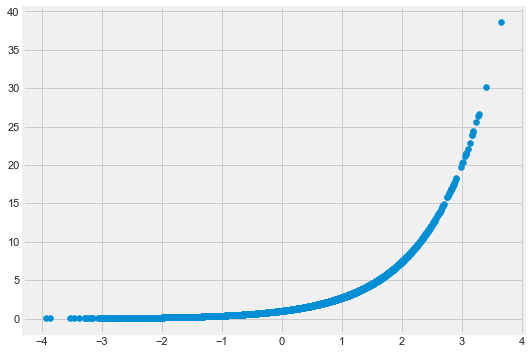

In [3]:
x = np.random.normal(0,1,10000)
y = np.exp(x)
f = plt.figure(figsize = (8, 6))
plt.scatter(x,y);

**2.13.b.** Draw a histogram of $y$.

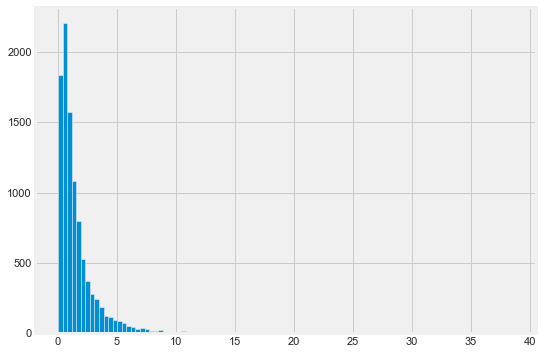

In [4]:
f = plt.figure(figsize = (8, 6))
plt.hist(y, bins = 100);

**2.15.** Generate $1,000$ random numbers with exponential distribution with parameter $\beta = 0.5$ from random uniform numbers. Recall $X \sim \mathrm{Exp}(\beta)$ if
$$
f(x) = \frac{1}{\beta} e^{-x/\beta}.
$$

In [5]:
x = np.random.uniform(size = 1000)
y = 0.5*np.log(1/(1-x))

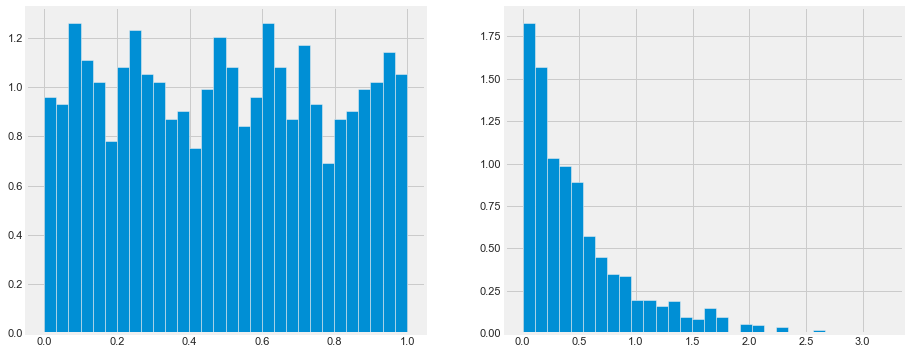

In [6]:
fig, axes = plt.subplots(figsize=(14,6), nrows=1, ncols=2)
axes[0].hist(x, density = True, bins = 30)
axes[1].hist(y, density = True, bins = 30);

**3.9.a.** Let $X = (X_i)_{1 \leq i \leq n}$ be independent $\mathrm{Bernoulli}(0.3)$ RVs and let $\overline{X}_n = \frac1{n} \sum_{1 \leq i \leq n} X_i$ be the **sample mean**. Plot $\overline{X}_n$ for $1 \leq n \leq 10,000$.

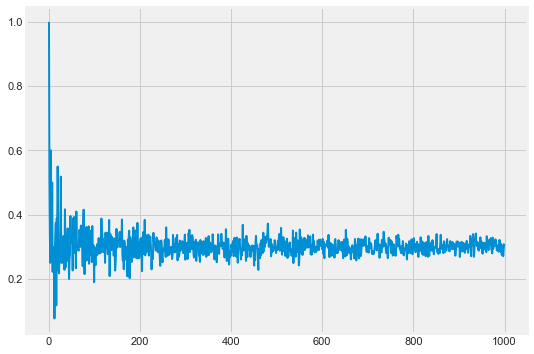

In [7]:
prop_heads = []
for n in range(1,1001):
    tosses = np.random.binomial(1, 0.3, n)
    prop_heads.append(np.mean(tosses))

f = plt.figure(figsize = (8,6))
plt.plot(np.arange(1,1001),prop_heads);

**3.9.b.** Let $X = (X_i)_{1 \leq i \leq n}$ be independent $\mathcal{N}(0,1)$ RVs. Plot $\overline{X}_n$ for $1 \leq n \leq 10,000$.

In [8]:
%%time
means = []
for n in range(1,10001):
    x = np.random.normal(0, 1, n)
    means.append(np.mean(x[:n]))

Wall time: 1.88 s


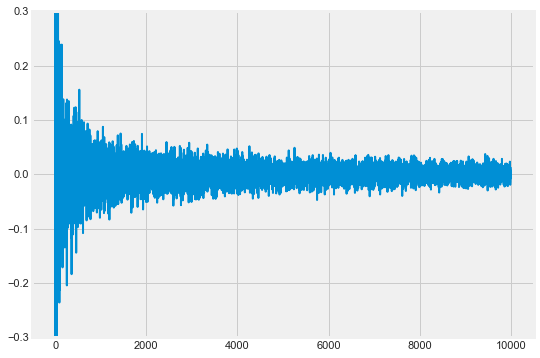

In [9]:
f = plt.figure(figsize = (8,6))
plt.plot(np.arange(1,10001),means)
plt.ylim([-0.3,0.3]);

**3.9.c.** Repeat for $X_i \sim \mathrm{Cauchy}$.

In [10]:
%%time
means = []
for n in range(1,10001):
    x = np.random.standard_cauchy(n)
    means.append(np.mean(x[:n]))

Wall time: 3.37 s


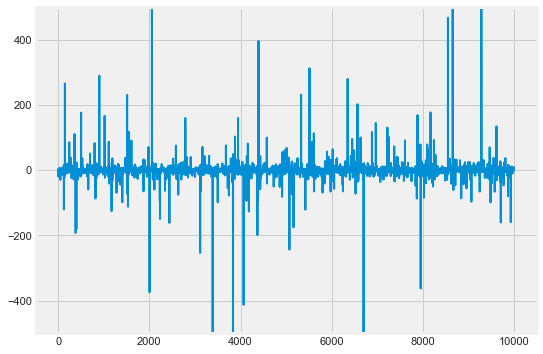

In [11]:
f = plt.figure(figsize = (8,6))
plt.plot(np.arange(1,10001),means)
plt.ylim([-500,500]);

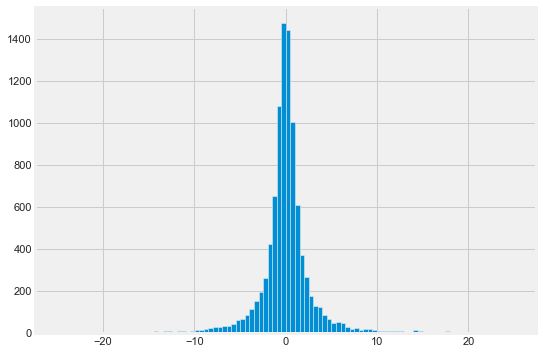

In [12]:
f = plt.figure(figsize = (8,6))
plt.hist(x[(x>-25) & (x<25)], bins=100); #truncate/cut tails

**3.9.d.** Repeat for $X_i \sim \mathrm{Uniform}(0,1)$ and plot the **sample variance** $S_n = \frac1{n} \sum_{1 \leq i \leq n} (X_i - \overline{X}_n)^2$ for $1 \leq n \leq 10,000$.

In [13]:
%%time
np.random.seed(101)
means = []
var = []
for n in range(1,10001):
    x = np.random.uniform(0,1, size = n)
    means.append(np.mean(x))
    var.append(np.var(x))

Wall time: 796 ms


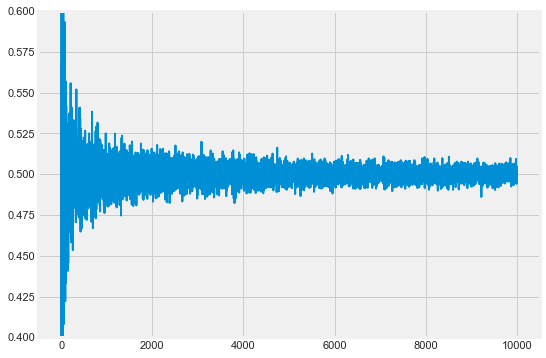

In [14]:
f = plt.figure(figsize = (8,6))
plt.plot(np.arange(1,10001),means)
plt.ylim([0.4,.6]);

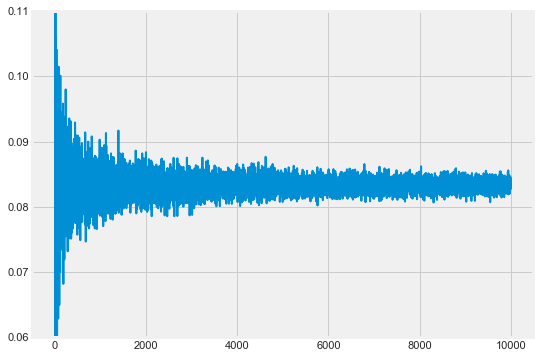

In [15]:
f = plt.figure(figsize = (8,6))
plt.plot(np.arange(1,10001),var)
plt.ylim([0.06,.11]);

**4.4.** Let $X = (X_i)_{1 \leq i \leq n}$ be independent $\mathrm{Bernoulli}(p)$ RVs and let $\hat{p}_n = \overline{X}_n = \frac1{n} \sum_{1 \leq i \leq n} X_i$. Define
$$
\varepsilon_n = \sqrt{\frac1{2n} \log \Bigl(\frac{2}{\alpha}\Bigr)}.
$$
and
$$
C_n = (\hat{p}_n -\varepsilon_n, \hat{p}_n +\varepsilon_n)
$$
for $\alpha > 0$. Show that
$$
P(C_n \ni p) \ge 1 - \alpha.
$$
Let $\alpha = 0.05$ and $p = 0.4$. Simulate the average of $C_n$ over $p$. i.e.,  compute the empirical probability $P(C_n \ni p) $ for $1 \leq n \leq 10,000$.

In [16]:
%%time
p = 0.4
alpha = 0.05
conf_int_bands = []
epsilon_list = []
N = 10001
sample_idx = np.arange(1,N)
for n in sample_idx:

    x = np.random.binomial(1, p, n)
    epsilon = np.sqrt(np.log(2./alpha)/(2*n))
    epsilon_list.append(epsilon)
    conf_int_bands.append([np.mean(x) - epsilon, np.mean(x) + epsilon])
    
    
epsilon_list = np.array(epsilon_list)
conf_int_bands = np.array(conf_int_bands)

Wall time: 1.3 s


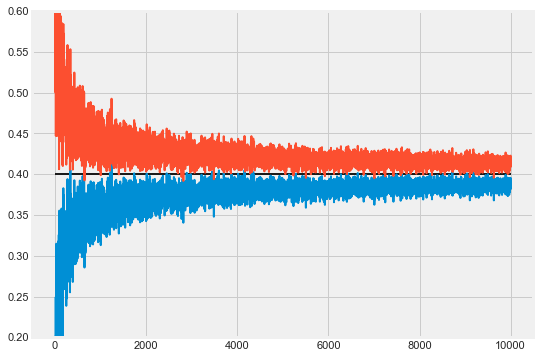

In [17]:
f = plt.figure(figsize = (8,6))
plt.plot(sample_idx, conf_int_bands)
plt.hlines(p,  xmin = 1, xmax = N)
plt.ylim(0.2, 0.6);

In [18]:
within = (p > conf_int_bands[:, 0]) & (p < conf_int_bands[:, 1])
within.sum()/within.shape[0]

0.9946

The proof is direct by Hoeffding inequality.

**5.Extra** Illustrate the CLM with Rademacher functions.

In [19]:
%%time
clt_x = []
for n in range(1,10001):
    x = np.random.binomial(1, 0.5, n)
    x = np.where(x == 0, -1, x)
    clt_x.append(np.sqrt(n)*np.mean(x[:n]))

Wall time: 1.34 s


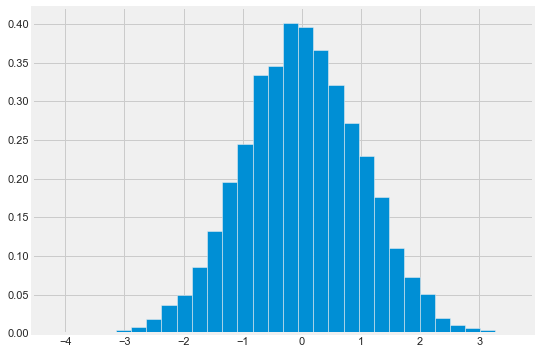

In [20]:
f = plt.figure(figsize = (8,6))
plt.hist(clt_x, density = True, bins = 30);